In [27]:
from datetime import datetime
from metpy.units import units
import metpy.calc.thermo as thermo
from siphon.simplewebservice.wyoming import WyomingUpperAir

In [82]:
import numpy as np
from scipy.ndimage.filters import gaussian_filter1d

In [11]:
import matplotlib.pyplot as plt

In [12]:
%matplotlib inline

In [20]:
date = datetime(2014, 5, 29, 0)
station = 'TUS'

In [105]:
import pandas as pd

In [110]:
df = WyomingUpperAir.request_data(this.date(), station)

In [79]:
p = df['pressure'].values * units(df.units['pressure'])
T = df['temperature'].values * units(df.units['temperature'])
Td = df['dewpoint'].values * units(df.units['dewpoint'])
u_wind = df['u_wind'].values * units(df.units['u_wind'])
u_wind = u_wind.to(units.meter/units.second)
v_wind = df['v_wind'].values * units(df.units['v_wind'])
v_wind = v_wind.to(units.meter/units.second)
height = df['height'].values * units(df.units['height'])

In [83]:
rh = thermo.relative_humidity_from_dewpoint(T, Td)
rh_smooth = gaussian_filter1d(rh, 5)

In [91]:
max_arg = np.argmax(rh)
max_arg_smooth = np.argmax(rh_smooth)

Text(0.5,1,'V component of wind')

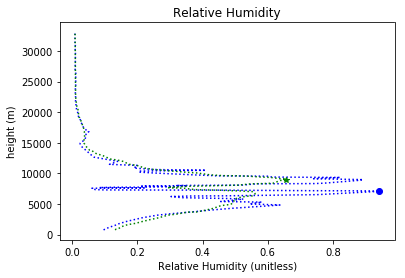

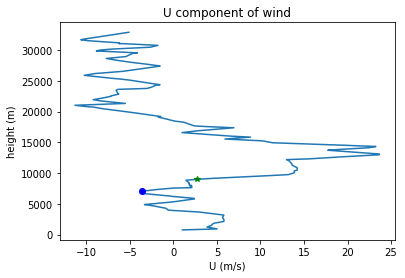

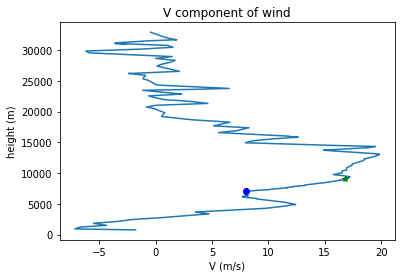

In [101]:
plt.figure()
plt.plot(rh, height, color='b', linestyle=':')
plt.plot(rh[max_arg], height[max_arg],
         marker='o', color='b')

plt.plot(rh_smooth, height, color='g', linestyle=':')
plt.plot(rh_smooth[max_arg_smooth], height[max_arg_smooth],
         marker='*', color='g')
plt.ylabel('height (m)')
plt.xlabel('Relative Humidity (unitless)')
plt.title('Relative Humidity')

plt.figure()
plt.plot(u_wind, height)
plt.plot(u_wind[max_arg], height[max_arg],
         marker='o', color='b')
plt.plot(u_wind[max_arg_smooth], height[max_arg_smooth],
         marker='*', color='g')
plt.ylabel('height (m)')
plt.xlabel('U (m/s)')
plt.title('U component of wind')

plt.figure()
plt.plot(v_wind, height)
plt.plot(v_wind[max_arg], height[max_arg],
         marker='o', color='b')
plt.plot(v_wind[max_arg_smooth], height[max_arg_smooth],
         marker='*', color='g')
plt.ylabel('height (m)')
plt.xlabel('V (m/s)')
plt.title('V component of wind')

Text(0.5,0,'Relative Humidity (unitless)')

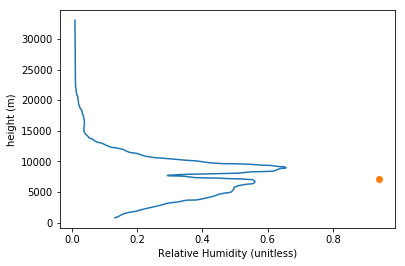

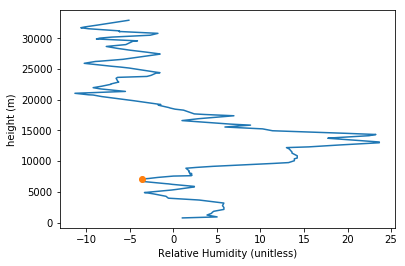

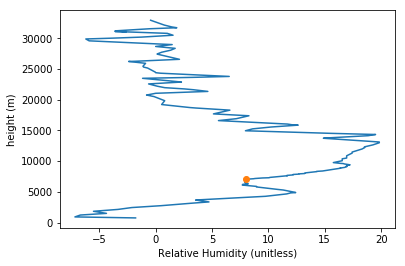

In [84]:
plt.figure()
plt.plot(rh_smooth, height)
plt.plot(rh[max_arg], height[max_arg], marker='o')
plt.ylabel('height (m)')
plt.xlabel('Relative Humidity (unitless)')

plt.figure()
plt.plot(u_wind, height)
plt.plot(u_wind[max_arg], height[max_arg], marker='o')
plt.ylabel('height (m)')
plt.xlabel('Relative Humidity (unitless)')

plt.figure()
plt.plot(v_wind, height)
plt.plot(v_wind[max_arg], height[max_arg], marker='o')
plt.ylabel('height (m)')
plt.xlabel('Relative Humidity (unitless)')